In [23]:
#!/usr/bin/env python

# noinspection PyUnresolvedReferences
import vtkmodules.vtkInteractionStyle
from vtkmodules.vtkCommonColor import vtkNamedColors
from vtkmodules.vtkCommonDataModel import vtkPiecewiseFunction
from vtkmodules.vtkIOLegacy import vtkStructuredPointsReader
from vtkmodules.vtkRenderingCore import (
    vtkColorTransferFunction,
    vtkRenderWindow,
    vtkRenderWindowInteractor,
    vtkRenderer,
    vtkVolume,
    vtkVolumeProperty
)
from vtkmodules.vtkRenderingVolume import vtkFixedPointVolumeRayCastMapper
# noinspection PyUnresolvedReferences
from vtkmodules.vtkRenderingVolumeOpenGL2 import vtkOpenGLRayCastImageDisplayHelper

In [25]:
def get_program_parameters():
    import argparse
    description = 'Volume rendering of a high potential iron protein.'
    epilogue = '''
    This is a simple volume rendering example that uses a vtkFixedPointVolumeRayCastMapper.
    '''
    parser = argparse.ArgumentParser(description=description, epilog=epilogue,
                                     formatter_class=argparse.RawDescriptionHelpFormatter)
    parser.add_argument('filename', help='ironProt.vtk')
    args = parser.parse_args()
    return args.filename

In [26]:
fileName = get_program_parameters()

colors = vtkNamedColors()

# This is a simple volume rendering example that
# uses a vtkFixedPointVolumeRayCastMapper

# Create the standard renderer, render window
# and interactor.
ren1 = vtkRenderer()

renWin = vtkRenderWindow()
renWin.AddRenderer(ren1)

iren = vtkRenderWindowInteractor()
iren.SetRenderWindow(renWin)

# Create the reader for the data.
reader = vtkStructuredPointsReader()
reader.SetFileName(fileName)

# Create transfer mapping scalar value to opacity.
opacityTransferFunction = vtkPiecewiseFunction()
opacityTransferFunction.AddPoint(20, 0.0)
opacityTransferFunction.AddPoint(255, 0.2)

# Create transfer mapping scalar value to color.
colorTransferFunction = vtkColorTransferFunction()
colorTransferFunction.AddRGBPoint(0.0, 0.0, 0.0, 0.0)
colorTransferFunction.AddRGBPoint(64.0, 1.0, 0.0, 0.0)
colorTransferFunction.AddRGBPoint(128.0, 0.0, 0.0, 1.0)
colorTransferFunction.AddRGBPoint(192.0, 0.0, 1.0, 0.0)
colorTransferFunction.AddRGBPoint(255.0, 0.0, 0.2, 0.0)

# The property describes how the data will look.
volumeProperty = vtkVolumeProperty()
volumeProperty.SetColor(colorTransferFunction)
volumeProperty.SetScalarOpacity(opacityTransferFunction)
volumeProperty.ShadeOn()
volumeProperty.SetInterpolationTypeToLinear()

# The mapper / ray cast function know how to render the data.
volumeMapper = vtkFixedPointVolumeRayCastMapper()
volumeMapper.SetInputConnection(reader.GetOutputPort())

# The volume holds the mapper and the property and
# can be used to position/orient the volume.
volume = vtkVolume()
volume.SetMapper(volumeMapper)
volume.SetProperty(volumeProperty)

ren1.AddVolume(volume)
ren1.SetBackground(colors.GetColor3d('Wheat'))
ren1.GetActiveCamera().Azimuth(45)
ren1.GetActiveCamera().Elevation(30)
ren1.ResetCameraClippingRange()
ren1.ResetCamera()

renWin.SetSize(600, 600)
renWin.SetWindowName('SimpleRayCast')
renWin.Render()

iren.Start()

usage: ipykernel_launcher.py [-h] filename
ipykernel_launcher.py: error: unrecognized arguments: -f


SystemExit: 2

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3386: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [15]:
ax.voxels??

In [17]:
X.shape

(120, 120)

In [18]:
Y.shape

(120, 120)

In [19]:
ax.contour3D??

In [20]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

In [22]:
np.meshgrid??

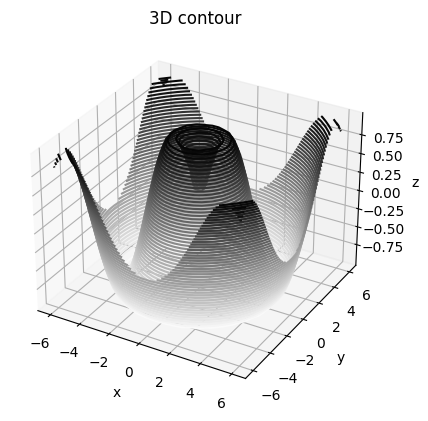

In [21]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D contour')
plt.show()

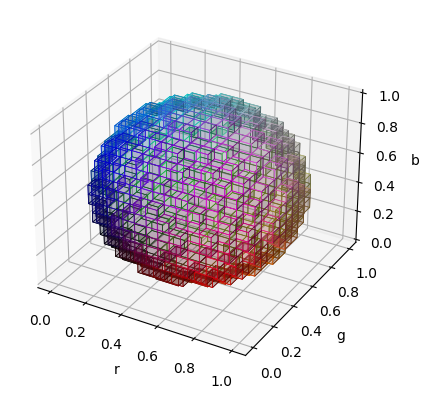

In [9]:
import matplotlib.pyplot as plt
import numpy as np


def midpoints(x):
    sl = ()
    for _ in range(x.ndim):
        x = (x[sl + np.index_exp[:-1]] + x[sl + np.index_exp[1:]]) / 2.0
        sl += np.index_exp[:]
    return x

# prepare some coordinates, and attach rgb values to each
r, g, b = np.indices((17, 17, 17)) / 16.0
rc = midpoints(r)
gc = midpoints(g)
bc = midpoints(b)

# define a sphere about [0.5, 0.5, 0.5]
sphere = (rc - 0.5)**2 + (gc - 0.5)**2 + (bc - 0.5)**2 < 0.5**2

# combine the color components
colors = np.zeros(sphere.shape + (3,))
colors[..., 0] = rc
colors[..., 1] = gc
colors[..., 2] = bc

# and plot everything
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(r, g, b, sphere,
          facecolors=colors,
          edgecolors=np.clip(2*colors - 0.5, 0, 1),  # brighter
          linewidth=0.5,alpha=0.2)
ax.set(xlabel='r', ylabel='g', zlabel='b')

plt.show()

In [14]:
ax.voxels??

In [12]:
colors.shape

(16, 16, 16, 3)

In [11]:
sphere.shape

(16, 16, 16)

In [10]:
r.shape

(17, 17, 17)

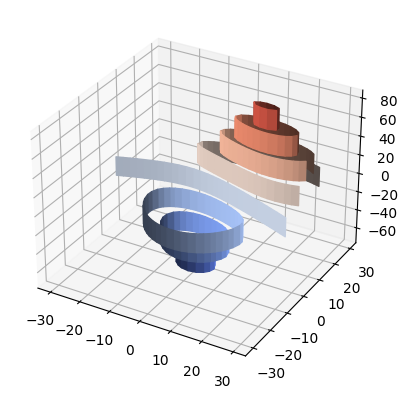

In [2]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

ax = plt.figure().add_subplot(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
ax.contour(X, Y, Z, extend3d=True, cmap=cm.coolwarm)

plt.show()

In [4]:
X.shape

(120, 120)

In [5]:
Y.shape

(120, 120)

In [6]:
Z.shape

(120, 120)

In [1]:
from mayavi import mlab

SystemExit: This program needs access to the screen. Please run with a
Framework build of python, and only when you are logged in
on the main display of your Mac.

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3386: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
x = np.random.random((10,10,10))